# Cleaning et Analyse

### Import

In [482]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from pandas_profiling import ProfileReport
import folium
import geopandas as gpd
import pickle as pkl

### Conversion types

In [483]:
df_sba = pd.read_csv("../Files/SBAnational.csv")

df_sba['SBA_Appv'] = df_sba['SBA_Appv'].str.replace('$','').str.replace(',','')
df_sba['SBA_Appv'] = df_sba['SBA_Appv'].astype('float64')

df_sba['GrAppv'] = df_sba['GrAppv'].str.replace('$','').str.replace(',','')
df_sba['GrAppv'] = df_sba['GrAppv'].astype('float64')

df_sba['DisbursementGross'] = df_sba['DisbursementGross'].str.replace('$','').str.replace(',','')
df_sba['DisbursementGross'] = df_sba['DisbursementGross'].astype('float64')

df_sba['BalanceGross'] = df_sba['BalanceGross'].str.replace('$','').str.replace(',','')
df_sba['BalanceGross'] = df_sba['BalanceGross'].astype('float64')

df_sba['ChgOffPrinGr'] = df_sba['ChgOffPrinGr'].str.replace('$','').str.replace(',','')
df_sba['ChgOffPrinGr'] = df_sba['ChgOffPrinGr'].astype('float64')

df_sba['ApprovalFY'] = df_sba['ApprovalFY'].replace('A', '', regex=True).astype(int)

df_sba['FranchiseCode'] = df_sba['FranchiseCode'].astype(str)
df_sba['FranchiseCode'] = df_sba['FranchiseCode'].apply(lambda s : s[:2])


/tmp/ipykernel_154763/2340951746.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sba = pd.read_csv("../Files/SBAnational.csv")
/tmp/ipykernel_154763/2340951746.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sba['SBA_Appv'] = df_sba['SBA_Appv'].str.replace('$','').str.replace(',','')
/tmp/ipykernel_154763/2340951746.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sba['GrAppv'] = df_sba['GrAppv'].str.replace('$','').str.replace(',','')
/tmp/ipykernel_154763/2340951746.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regul

### Analyse globale

In [484]:
# report = sv.analyze(df_sba)
# report.show_html('report.html') 

In [485]:
# profile = ProfileReport(df_sba, title="Pandas Profiling Report")
# profile.to_widgets()

In [486]:
# profile.to_notebook_iframe()

### Variable Cible

In [487]:
def pie(feature):
    plt.figure(figsize=(18,7))
    colors = sns.color_palette('pastel')
    plt.pie(df_sba[feature].value_counts(), labels=df_sba[feature].unique(), colors = colors, autopct='%.1f%%', textprops={'fontsize':15})
    plt.title(f"{feature} rate", fontsize=25)
    plt.show()

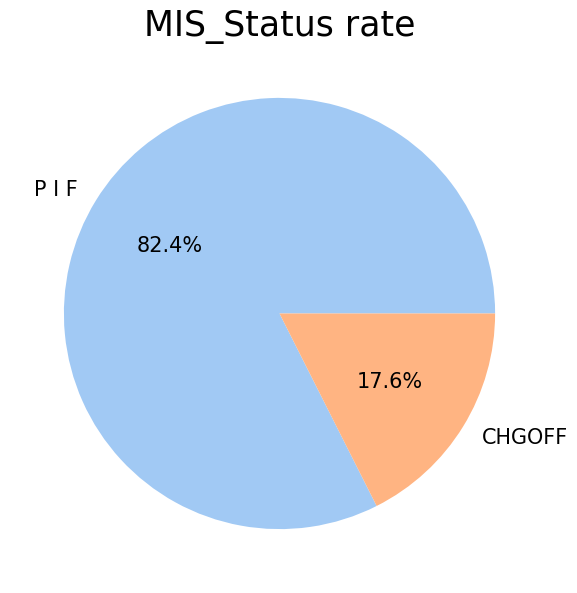

In [488]:
df_sba = df_sba[df_sba['MIS_Status'].notnull()]
pie("MIS_Status")

### Variables explicatives

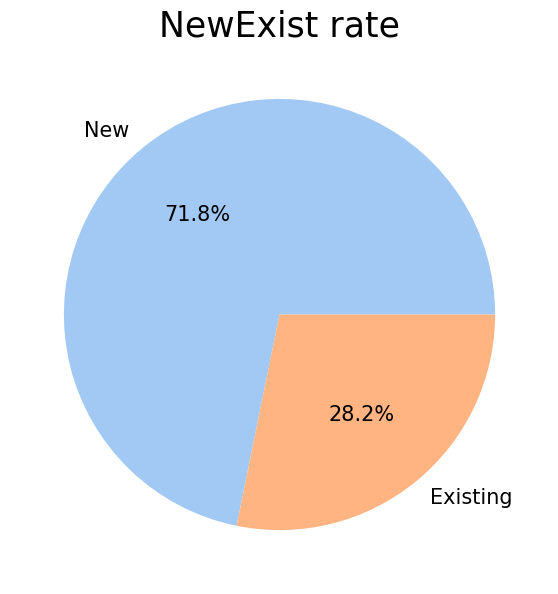

In [489]:
df_sba = df_sba[df_sba['NewExist'].notnull()]
df_sba = df_sba[df_sba['NewExist']!=0.0]
df_sba.NewExist.replace(1.0,'Existing', inplace=True)
df_sba.NewExist.replace(2.0,'New', inplace=True)
pie("NewExist")

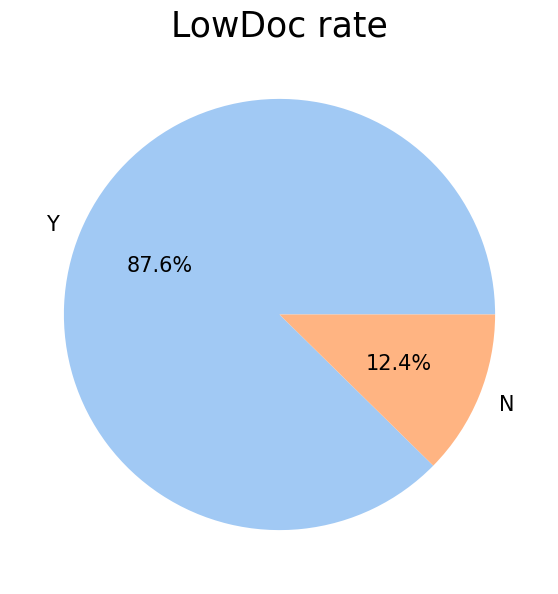

In [490]:
keep = list(df_sba['LowDoc'].value_counts().index[0:2])
df_sba = df_sba[df_sba['LowDoc'].isin(keep)]
pie("LowDoc")

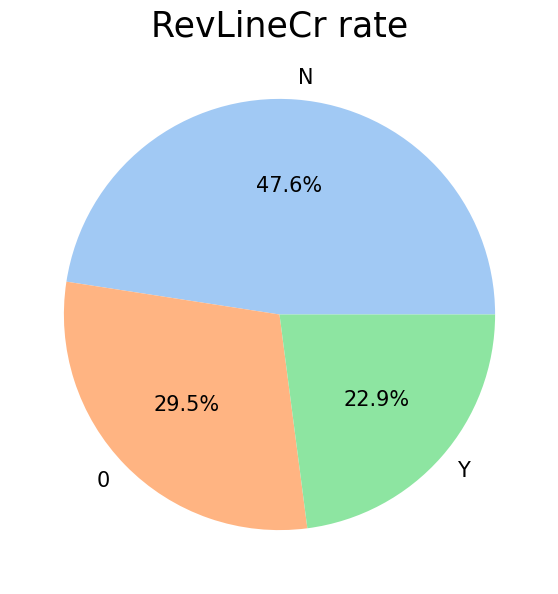

In [491]:
keep = list(df_sba['RevLineCr'].value_counts().index[0:3])
df_sba = df_sba[df_sba['RevLineCr'].isin(keep)]
pie("RevLineCr")

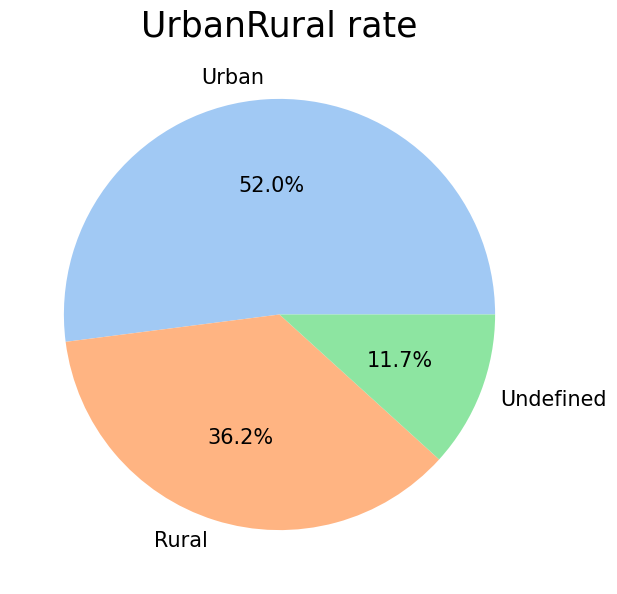

In [492]:
df_sba.UrbanRural.replace({0:'Urban',1:'Rural',2:'Undefined'},inplace=True)
pie("UrbanRural")

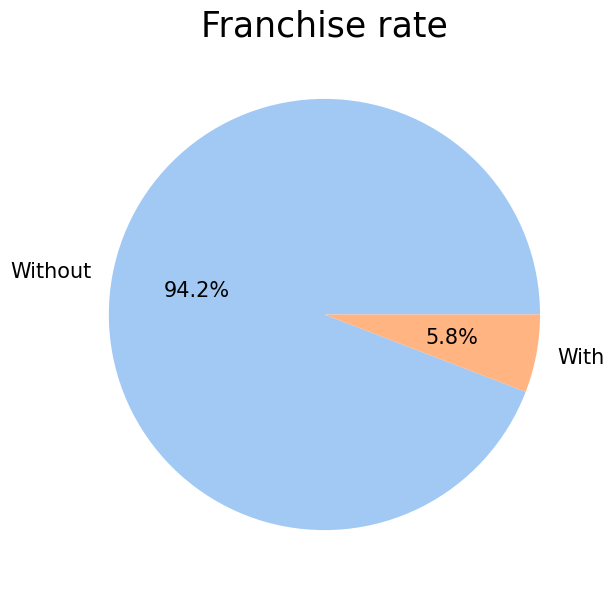

In [493]:
def hasFranchise(code):
    if code in ['0','1']:
        return 'Without'
    else :
        return 'With'

df_sba['Franchise'] = df_sba['FranchiseCode'].apply(lambda code : hasFranchise(code))

pie("Franchise")

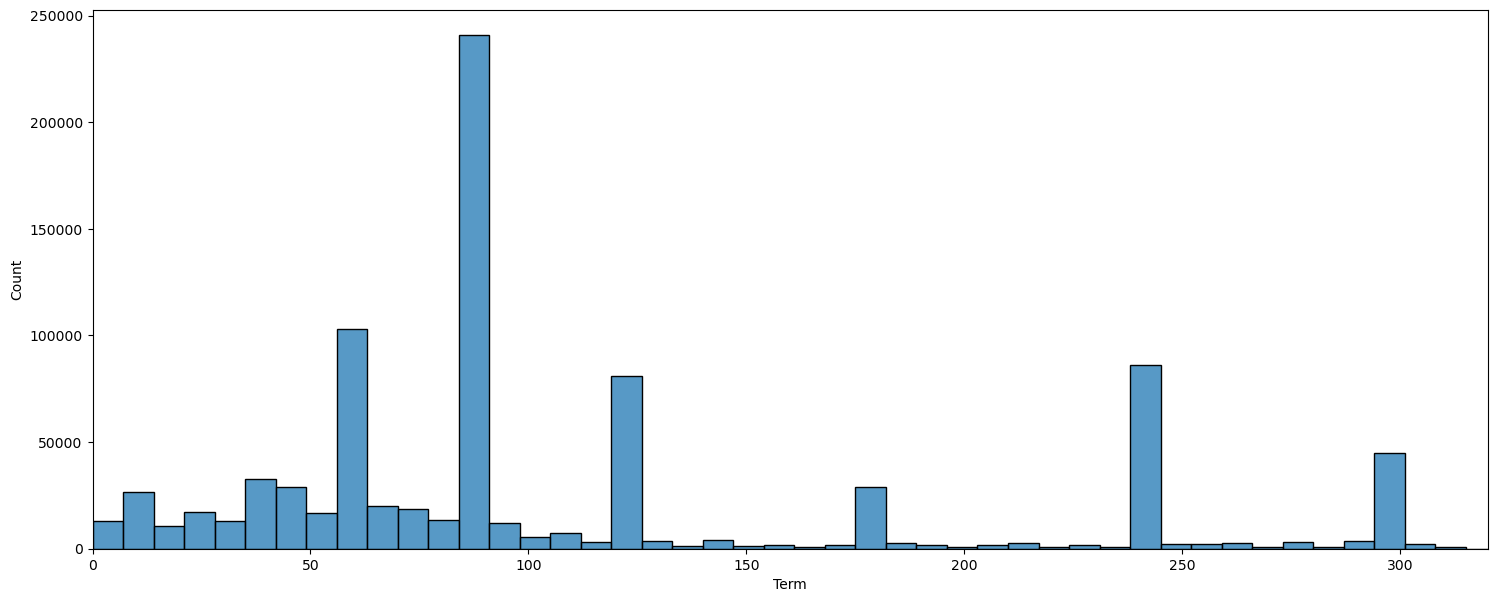

In [494]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_sba, x="Term", binwidth=7)
plt.xlim(0, 320)
plt.show()

In [495]:
def hist(feature) :
    plt.figure(figsize=(18,7))
    plt.title(f"Distribution de {feature}", fontsize=25)
    sns.histplot(data=df_sba, x=feature)
    plt.xlabel(feature, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    if feature == "NAICS_names":
        plt.xticks(fontsize=18,rotation=90)
    else :
        plt.xticks(fontsize=12)
    plt.yticks(fontsize=15)
    plt.show()

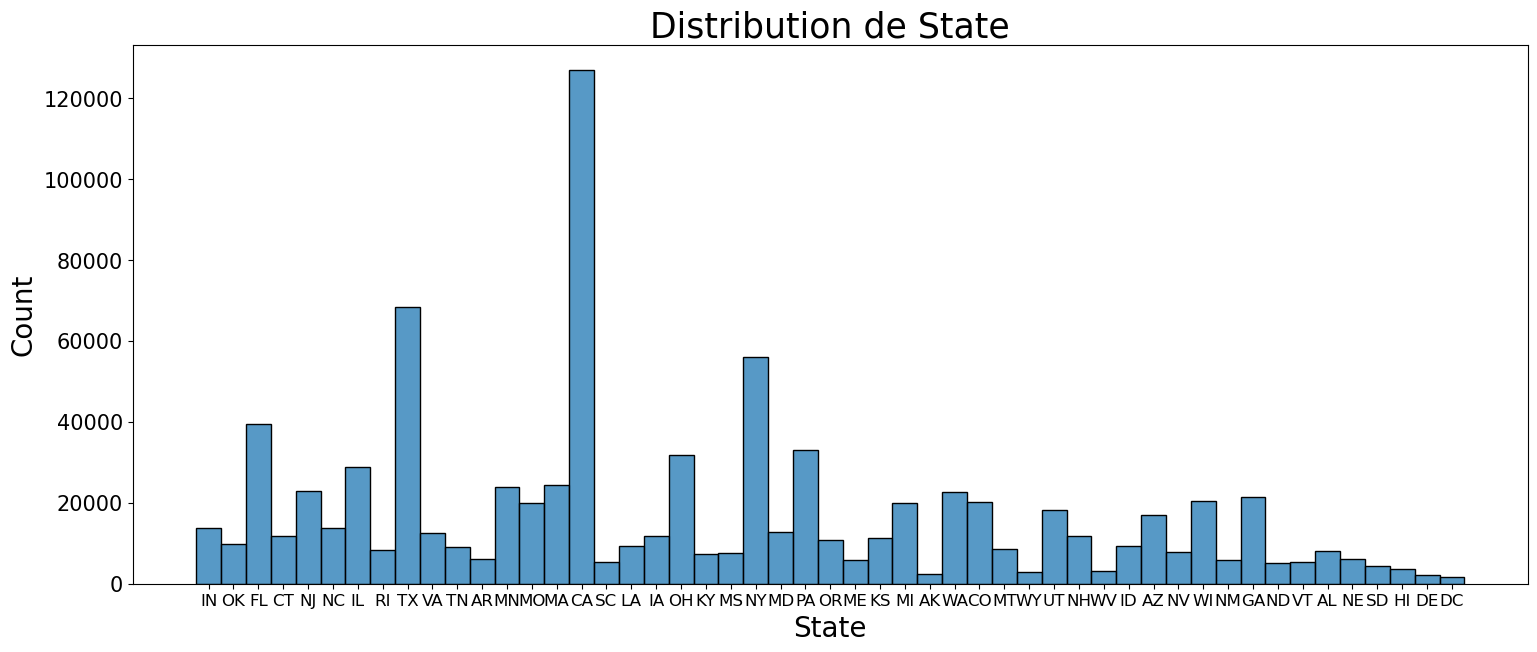

In [496]:
hist("State")

In [497]:
NAICS_names =  {"11":"Agriculture, forestry, fishing and hunting","72":"Accommodation and food services","21":"Mining, quarrying, and oil and gas extraction","22":
"Utilities","23":"Construction","31":"Manufacturing","32":"Manufacturing","33":"Manufacturing","42":"Wholesale trade","44":"Retail trade","45":"Retail trade","48":" Transportation and warehousing", "49":"Transportation and warehousing", "51":"Information","52":"Finance and insurance", "53":"Real estate and rental and leasing","54":"Professional, scientific, and technical services","55":"Management of companies and enterprises","56":"Administrative and support and waste management and remediation services","61":"Educational services","62":"Health care and social assistance","71":"Arts, entertainment, and recreation","81":"Other services (except public administration)", "92": "Public administration","0":"Other"}

NAICS_list = [(key,value) for key,value in NAICS_names.items()]
fichier = open('../django/NAICS_list.pkl', 'wb')
pkl.dump(NAICS_list, fichier)
fichier.close()




In [498]:
df_sba['NAICS'] = df_sba['NAICS'].astype(str)
df_sba['NAICS'] = df_sba['NAICS'].apply(lambda s : s[0:2])
df_sba["NAICS_names"] = df_sba["NAICS"].replace(NAICS_names)

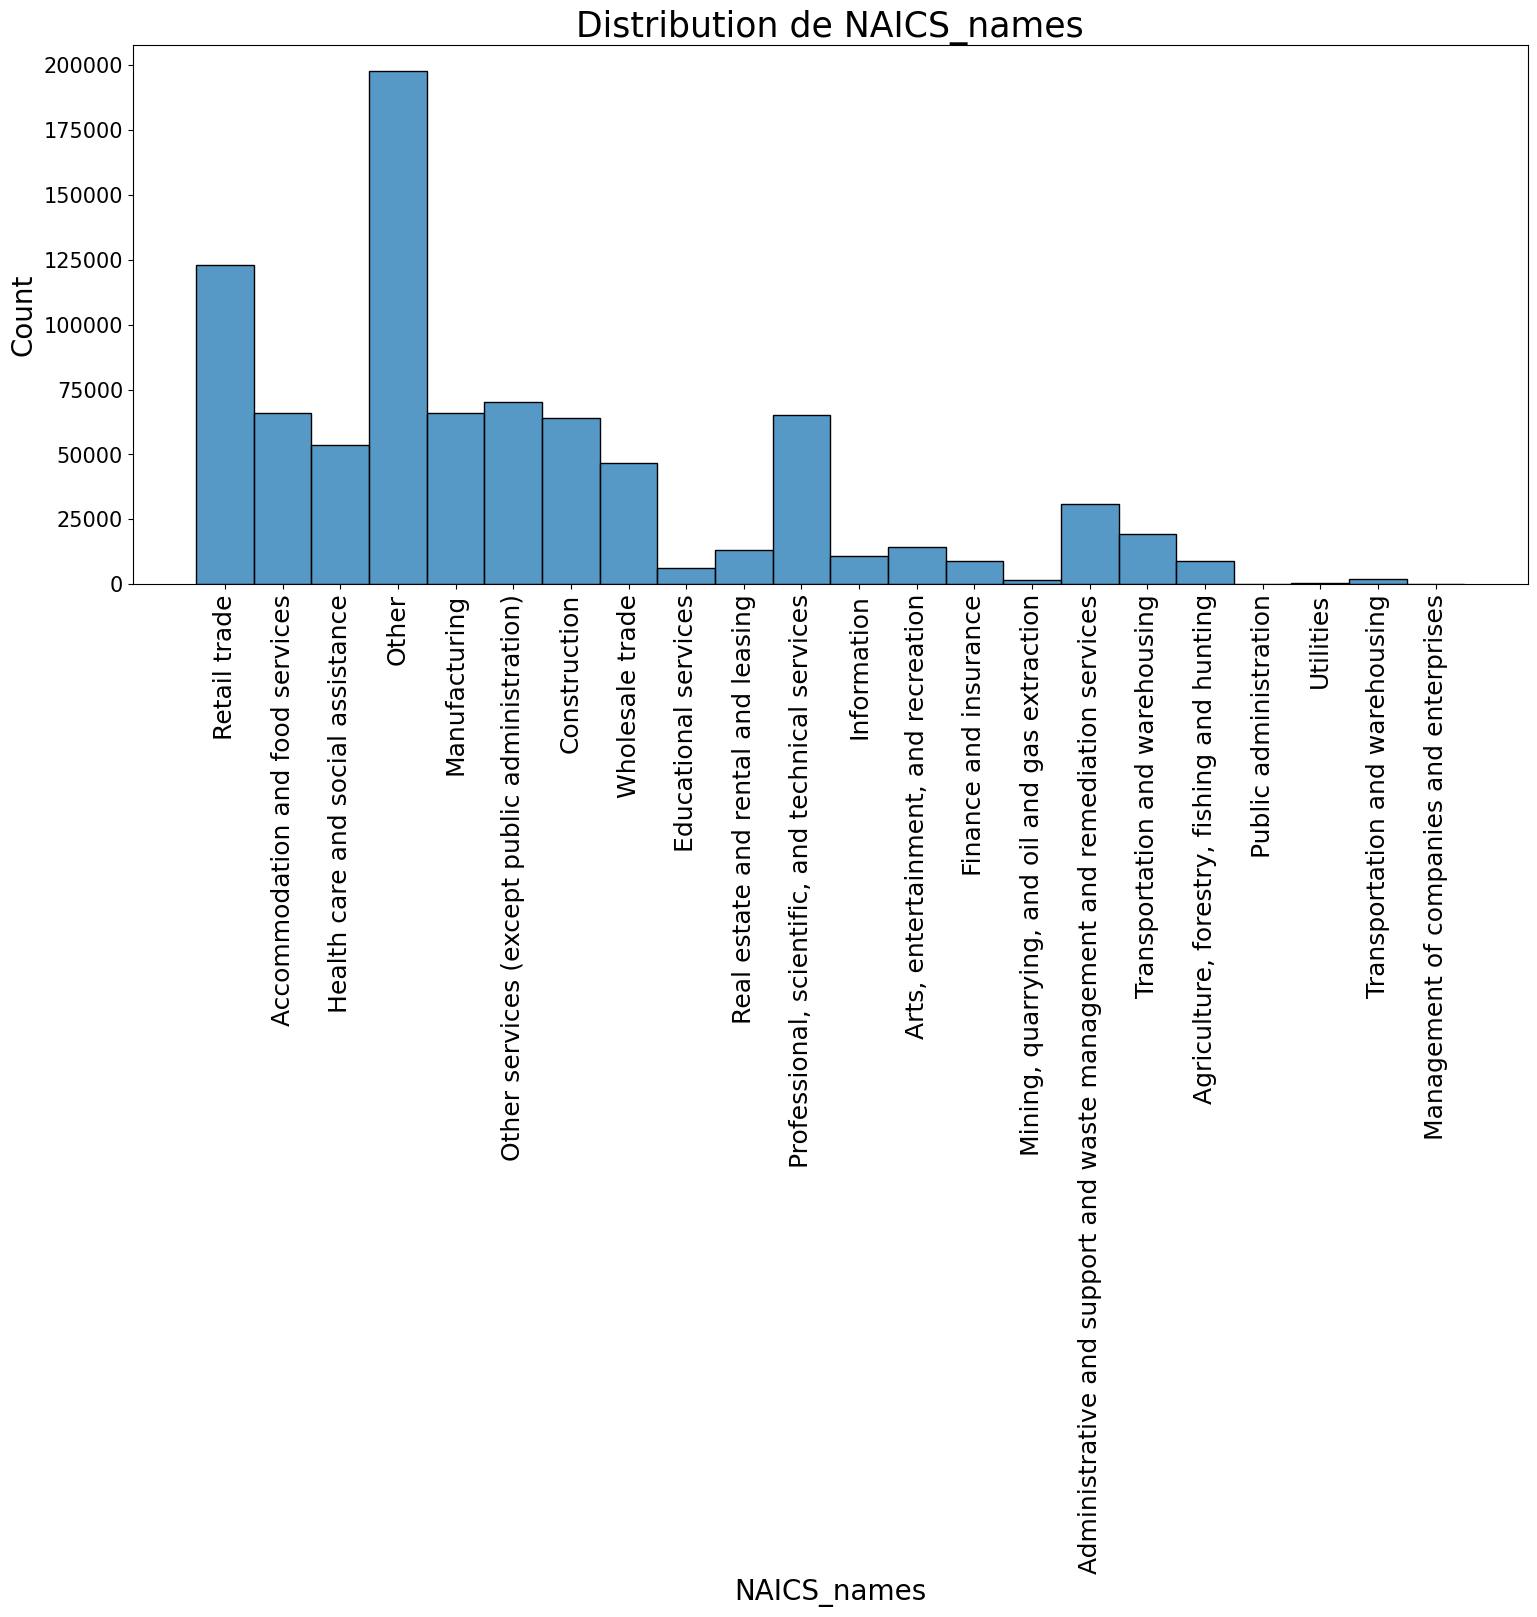

In [499]:
hist("NAICS_names")

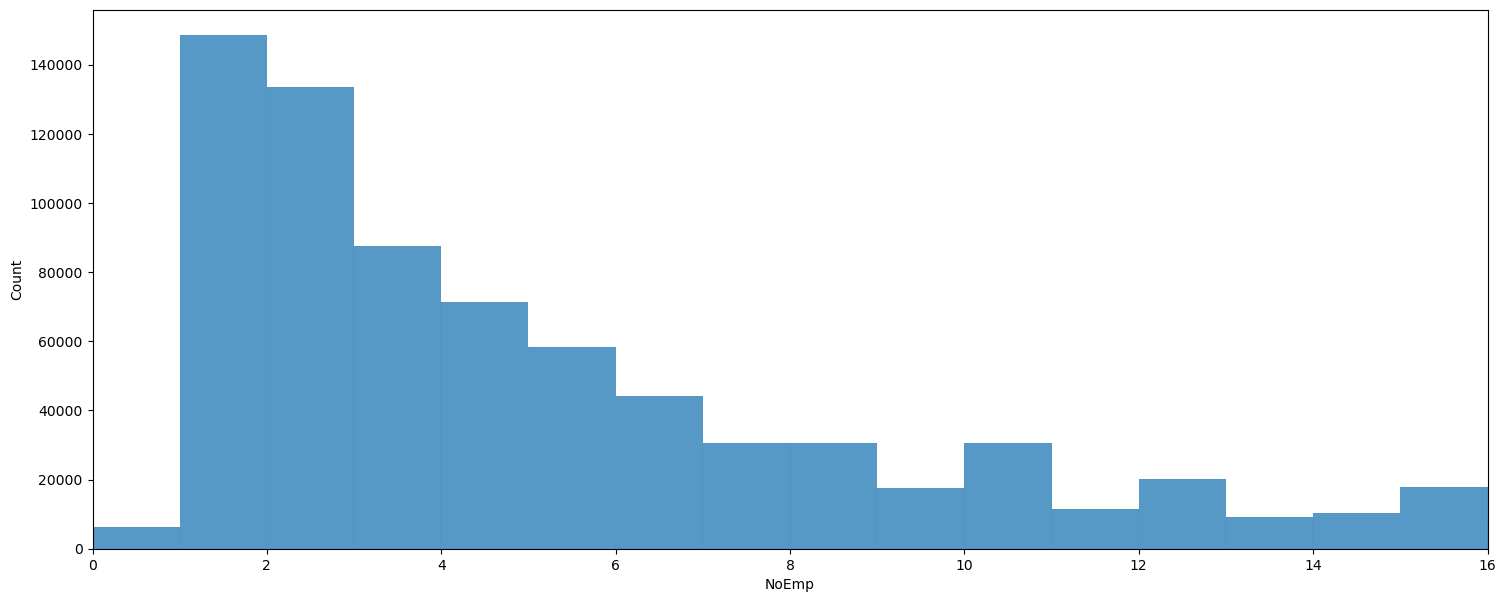

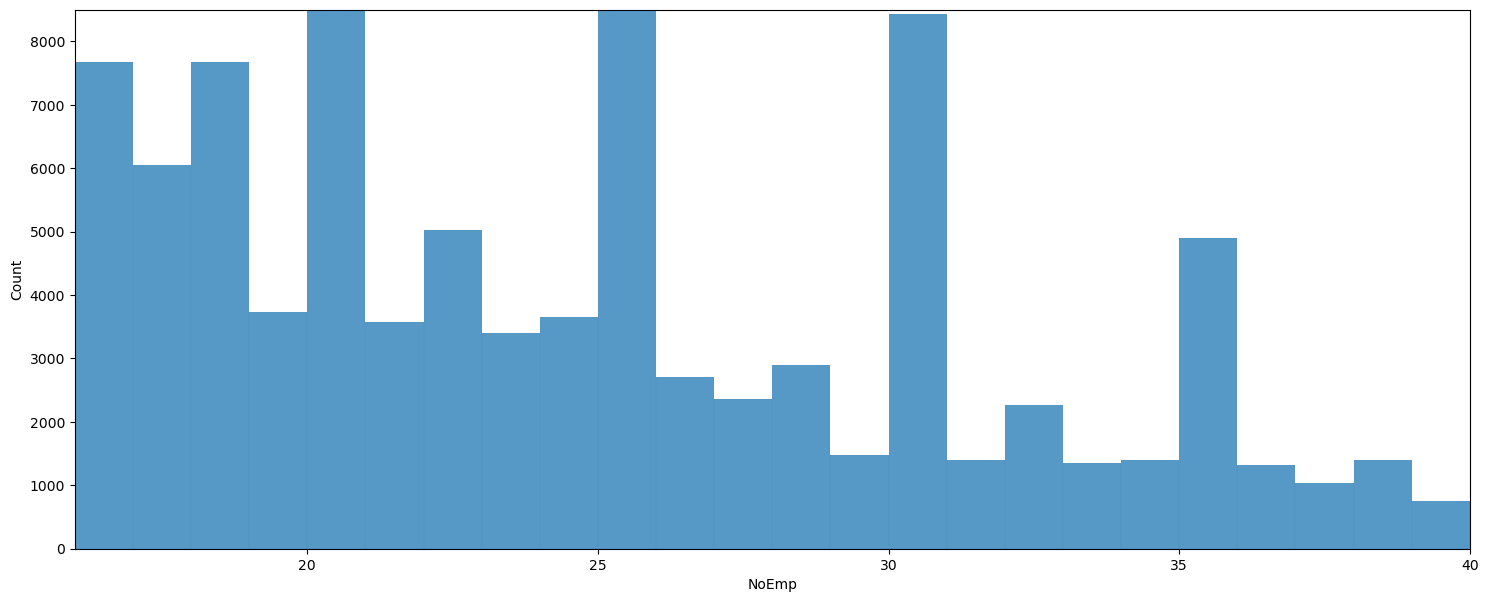

In [500]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_sba, x="NoEmp", binwidth=1)
plt.xlim(0, 16)
plt.show()

plt.figure(figsize=(18,7))
sns.histplot(data=df_sba, x="NoEmp", binwidth=1)
plt.xlim(16, 40)
plt.ylim(0,8500)
plt.show()

### Nettoyage State

In [501]:
nan_State = df_sba['State'].isnull()
df_sba[nan_State][['City','State','Zip']]

,City,State,Zip
264664,CAMERON PARK,NaN,95682
306274,"BOX 267, APO AP",NaN,96205
328526,WICHITA,NaN,67219
351072,"1542,TABUK,SAUDI ARABIA",NaN,79925
366139,PALM BEACH GARDENS,NaN,33410
366158,CASCO,NaN,54205
367007,SOMERSET,NaN,54025
379174,SALT LAKE CITY,NaN,84124
385418,LAKE OZARK,NaN,65049
869948,A452638533,NaN,75236


In [502]:
df_sba[df_sba['City']=="LAKE OZARK"][['State','BankState']]
# df_sba[(df_sba['City']=="LAKE OZARK") & nan_State][['State','BankState']]
# df_sba[(df_sba['City']=="LAKE OZARK") & (df_sba['BankState']=="MO")][['State','BankState']]

,State,BankState
14381,MO,MO
24002,MO,NC
24420,MO,MO
48008,MO,MO
65626,MO,IL
...,...,...
863388,MO,MO
874505,MO,MO
889844,MO,MO
897530,MO,MO


In [503]:

df_sba.loc[df_sba['City'] == "JOHNSTOWN       NY", 'State'] = "NY"
df_sba.loc[df_sba['City'] == "JOHNSTOWN       NY", 'City'] = "JOHNSTOWN"
df_sba.loc[(df_sba['City'] == "CAMERON PARK") & nan_State, 'State'] = "CA"
df_sba.drop(df_sba[df_sba["City"] == "BOX 267, APO  AP"].index, inplace=True)
df_sba.loc[(df_sba['City'] == "WICHITA") & nan_State, 'State'] = "KS"
df_sba.drop(df_sba[df_sba["City"] == "1542,TABUK,SAUDI ARABIA"].index, inplace=True)
df_sba.loc[(df_sba['City'] == "PALM BEACH GARDENS") & nan_State, 'State'] = "FL"
df_sba.loc[(df_sba['City'] == "CASCO") & nan_State, 'State'] = "WI"
df_sba.loc[(df_sba['City'] == "SOMERSET") & nan_State, 'State'] = "WI"
df_sba.loc[(df_sba['City'] == "SALT LAKE CITY") & nan_State, 'State'] = "UT"
df_sba.loc[(df_sba['City'] == "LAKE OZARK") & nan_State, 'State'] = "MO"
df_sba.drop(df_sba[df_sba["City"] == "A452638533"].index, inplace=True)


### Proportion de prêts non-remboursé par State

In [504]:
def percent_of_CHGOFF(df):
    nb_CHGOFF = df[df=='CHGOFF'].shape[0]
    nb_total = df.shape[0]
    return round((nb_CHGOFF / nb_total)*100,2)

In [505]:
df_state = df_sba[['State','MIS_Status']]
df_state = df_state.groupby('State').agg(percent_of_CHGOFF).rename(columns={'MIS_Status' : 'percent_of_CHGOFF'}).reset_index()
df_state

,State,percent_of_CHGOFF
0,AK,11.80
1,AL,16.58
2,AR,16.75
3,AZ,20.37
4,CA,17.78
5,CO,17.87
6,CT,13.68
7,DC,23.74
8,DE,17.58
9,FL,25.71


In [506]:
gdf = gpd.read_file('../Files/us-states.json')
gdf

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."
5,CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9..."
6,CT,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022..."
7,DE,Delaware,"POLYGON ((-75.41409 39.80446, -75.50720 39.683..."
8,FL,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003..."
9,GA,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787..."


In [507]:
state_list = [(gdf.id[i],gdf.name[i]) for i in range(gdf.shape[0])]
fichier = open('../django/state_list.pkl', 'wb')
pkl.dump(state_list, fichier)
fichier.close()

In [508]:
# create a base map
m = folium.Map(location=[50, -95], zoom_start=3)

# read a GeoJSON file with Pandas

# # merge the data and the GeoJSON file
merged = gdf.merge(df_state, left_on='id', right_on='State')

# create a choropleth map
folium.Choropleth(
    geo_data=merged,
    name='choropleth',
    data=df_state,
    columns=['State', 'percent_of_CHGOFF'],
    key_on='feature.properties.id',
    fill_color='Reds',
    fill_opacity=1,
    line_opacity=0.4,
    legend_name='pourcentage de non remboursement'
).add_to(m)

# folium.GeoJson(gdf, name='name', style_function=lambda feature: {
#         'fillColor': 'green',
#         'color': 'black',
#         'weight': 1,
#         'dashArray': '5, 5'
#     }).add_to(m)

# display the map
# display(m)

# ajouter des marqueurs pour chaque état
for row in merged.itertuples():
    if row.percent_of_CHGOFF > 21 :
        folium.Marker(location=[row.geometry.centroid.y, row.geometry.centroid.x], popup=row.name).add_to(m)


folium.LayerControl().add_to(m)
# afficher la carte
display(m)

### Target leaking variables

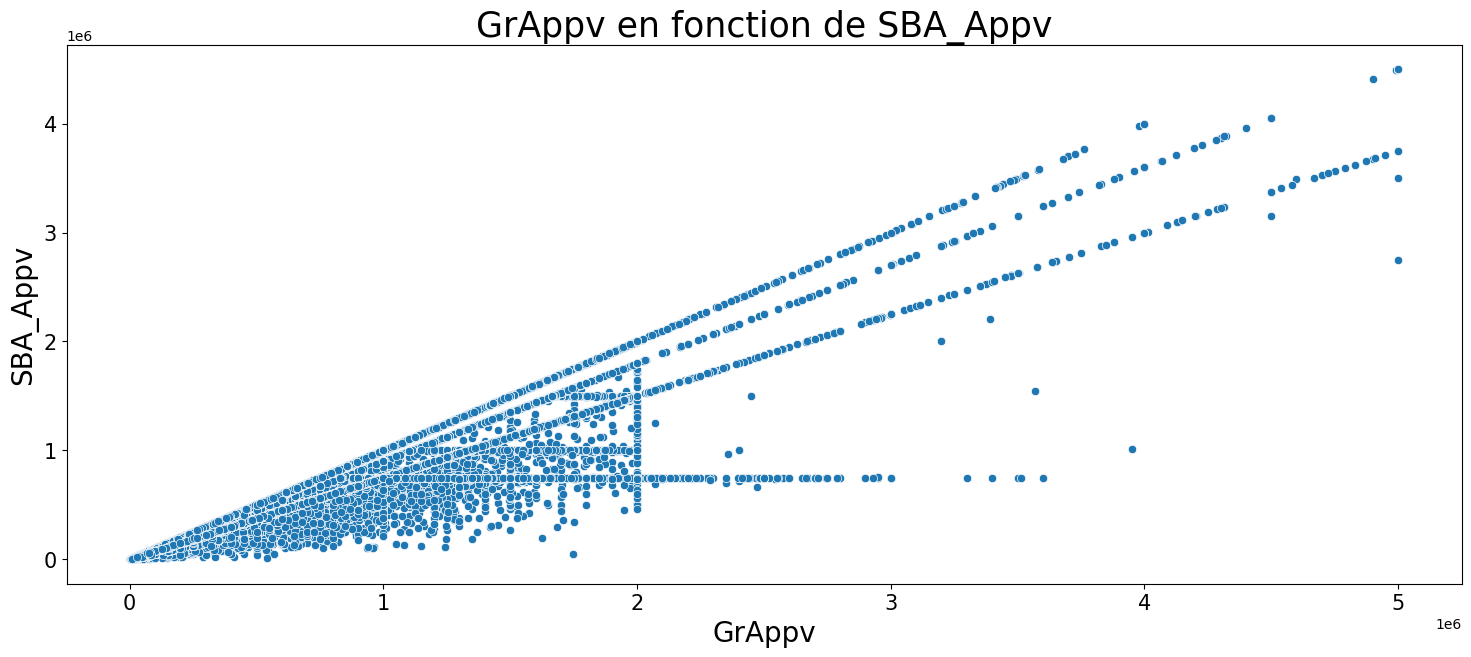

In [509]:
plt.figure(figsize=(18,7))
plt.title("GrAppv en fonction de SBA_Appv", fontsize=25)
sns.scatterplot(data=df_sba, x="GrAppv", y="SBA_Appv")
plt.xlabel("GrAppv", fontsize=20)
plt.ylabel("SBA_Appv", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

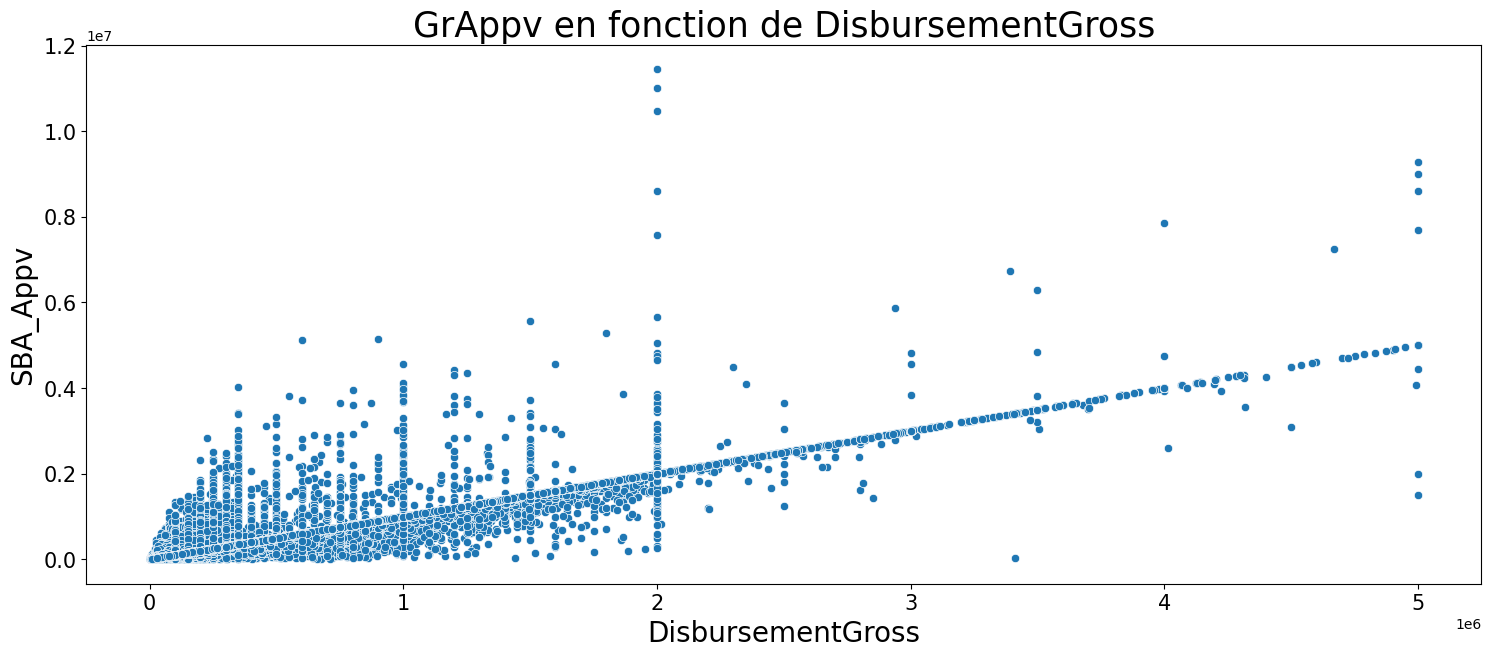

In [510]:
plt.figure(figsize=(18,7))
plt.title("GrAppv en fonction de DisbursementGross", fontsize=25)
sns.scatterplot(data=df_sba, x="GrAppv", y="DisbursementGross")
plt.xlabel("DisbursementGross", fontsize=20)
plt.ylabel("SBA_Appv", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [511]:
df_sba = df_sba.drop(['LoanNr_ChkDgt','Name','Bank','ApprovalDate','RevLineCr','LowDoc','ChgOffDate','DisbursementDate','DisbursementGross','BalanceGross','ChgOffPrinGr','SBA_Appv','City','Zip','NAICS_names','FranchiseCode'],axis=1)

df_sba.to_csv('../Files/SBAclean.csv',index=False)

In [512]:
# df_sba[(df_sba['ChgOffDate'].notna()) & (df_sba['MIS_Status']=='P I F')][['ChgOffDate','MIS_Status']]
# df_sba[df_sba['MIS_Status']=='P I F'][['ChgOffDate','MIS_Status']]

In [513]:
# uvicorn main:app --reload